# Numerical integrals

What about when we cannot integrate a function analytically? In other words, when there is no (obvious) closed-form solution. In these cases, we can use **numerical methods** to solve the problem.

Let's use this problem:
\begin{align}
\frac{dy}{dx} &= e^{-x^2} \\
y(x) &= \int e^{-x^2} dx + C
\end{align}

(You may recognize this as leading to the error function, $\text{erf}$:
$\frac{1}{2} \sqrt{\pi} \text{erf}(x) + C$,
so the exact solution to the integral over the range $[0,1]$ is 0.7468.)

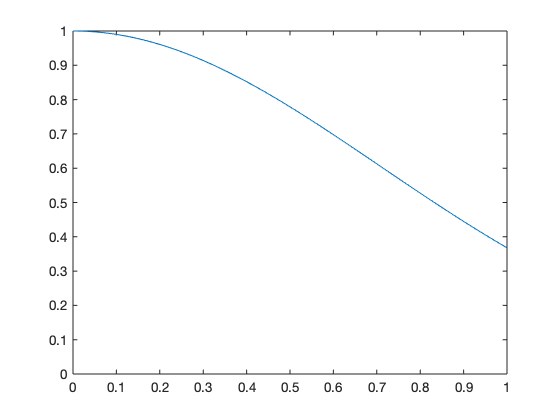

In [1]:
x = linspace(0, 1);
f = @(x) exp(-x.^2);
plot(x, f(x))
axis([0 1 0 1])

## Numerical integration: Trapezoidal rule

In such cases, we can find the integral by using the **trapezoidal rule**, which finds the area under the curve by creating trapezoids and summing their areas:
\begin{equation}
\text{area under curve} = \sum \left( \frac{f(x_{i+1}) + f(x_i)}{2} \right) \Delta x
\end{equation}

Let's see what this looks like with four trapezoids ($\Delta x = 0.25$):

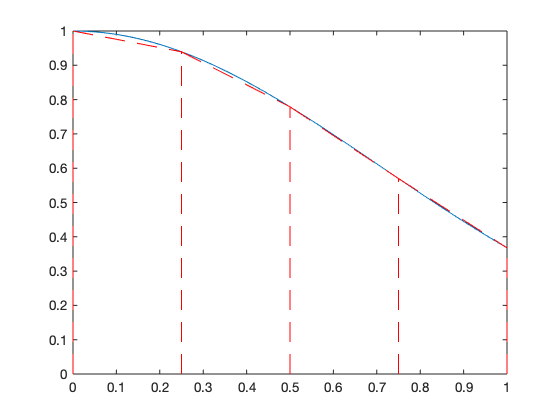

In [2]:
hold off
x = linspace(0, 1);
plot(x, f(x)); hold on
axis([0 1 0 1])

x = 0 : 0.25 : 1;

% plot the trapezoids
for i = 1 : length(x)-1
    xline = [x(i), x(i)];
    yline = [0, f(x(i))];
    line(xline, yline, 'Color','red','LineStyle','--')
    xline = [x(i+1), x(i+1)];
    yline = [0, f(x(i+1))];
    line(xline, yline, 'Color','red','LineStyle','--')
    xline = [x(i), x(i+1)];
    yline = [f(x(i)), f(x(i+1))];
    line(xline, yline, 'Color','red','LineStyle','--')
end
hold off

Now, let's integrate using the trapezoid formula given above:

In [3]:
dx = 0.1;
x = 0.0 : dx : 1.0;

area = 0.0;
for i = 1 : length(x)-1
    area = area + (dx/2)*(f(x(i)) + f(x(i+1)));
end

fprintf('Numerical integral: %f\n', area)
exact = 0.5*sqrt(pi)*erf(1);
fprintf('Exact integral: %f\n', exact)
fprintf('Error: %f %%\n', 100.*abs(exact-area)/exact)

Numerical integral: 0.746211
Exact integral: 0.746824
Error: 0.082126 %


We can see that using the trapezoidal rule, a numerical integration method, with an internal size of $\Delta x = 0.1$ leads to an approximation of the exact integral with an error of 0.08%.

You can make the trapezoidal rule more accurate by:

- using more segments (that is, a smaller value of $\Delta x$, or
- using higher-order polynomials (such as with Simpson's rules) over the simpler trapezoids.

First, how does reducing the segment size (step size) by a factor of 10 affect the error?

In [4]:
dx = 0.01;
x = 0.0 : dx : 1.0;

area = 0.0;
for i = 1 : length(x)-1
    area = area + (dx/2)*(f(x(i)) + f(x(i+1)));
end

fprintf('Numerical integral: %f\n', area)
exact = 0.5*sqrt(pi)*erf(1);
fprintf('Exact integral: %f\n', exact)
fprintf('Error: %f %%\n', 100.*abs(exact-area)/exact)

Numerical integral: 0.746818
Exact integral: 0.746824
Error: 0.000821 %


So, reducing our step size by a factor of 10 (using 100 segments instead of 10) reduced our error by a factor of 100!

## Numerical integration: Simpson's rule

We can increase the accuracy of our numerical integration approach by using a more sophisticated interpolation scheme with each segment. In other words, instead of using a straight line, we can use a polynomial. **Simpson's rule**, also known as Simpson's 1/3 rule, refers to using a quadratic polynomial to approximate the line in each segment.

Simpson's rule defines the definite integral for our function $f(x)$ from point $a$ to point $b$ as
\begin{equation}
\int_a^b f(x) \approx \frac{1}{6} \Delta x \left( f(a) + 4 f \left(\frac{a+b}{2}\right) + f(b) \right)
\end{equation}
where $\Delta x = b - a$.

That equation comes from interpolating between points $a$ and $b$ with a third-degree polynomial, then integrating by parts.

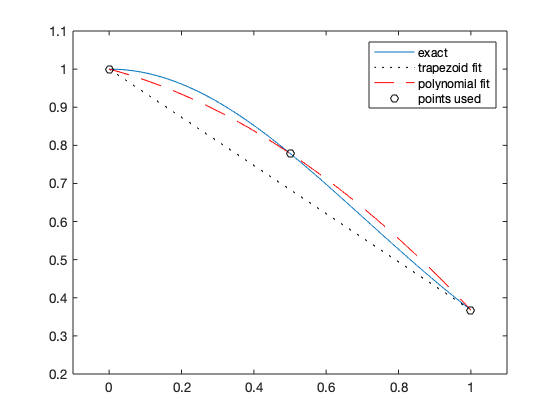

In [5]:
hold off
x = linspace(0, 1);
plot(x, f(x)); hold on
axis([-0.1 1.1 0.2 1.1])

plot([0 1], [f(0) f(1)], 'Color','black','LineStyle',':');

% quadratic polynomial
a = 0; b = 1; m = (b-a)/2;
p = @(z) (f(a).*(z-m).*(z-b)/((a-m)*(a-b))+f(m).*(z-a).*(z-b)/((m-a)*(m-b))+f(b).*(z-a).*(z-m)/((b-a)*(b-m)));
plot(x, p(x), 'Color','red','LineStyle','--');

xp = [0 0.5 1];
yp = [f(0) f(m) f(1)];
plot(xp, yp, 'ok')
hold off
legend('exact', 'trapezoid fit', 'polynomial fit', 'points used')

We can see that the polynomial fit, used by Simpson's rule, does a better job of of approximating the exact function, and as a result Simpson's rule will be more accurate than the trapezoidal rule.

Next let's apply Simpson's rule to perform the same integration as above:

In [6]:
dx = 0.1;
x = 0.0 : dx : 1.0;

area = 0.0;
for i = 1 : length(x)-1
    area = area + (dx/6.)*(f(x(i)) + 4*f((x(i)+x(i+1))/2.) + f(x(i+1)));
end

fprintf('Simpson rule integral: %f\n', area)
exact = 0.5*sqrt(pi)*erf(1);
fprintf('Exact integral: %f\n', exact)
fprintf('Error: %f %%\n', 100.*abs(exact-area)/exact)

Simpson rule integral: 0.746824
Exact integral: 0.746824
Error: 0.000007 %


Simpson's rule is about three orders of magnitude (~1000x) more accurate than the trapezoidal rule.

In this case, using a more-accurate method allows us to significantly reduce the error while still using the same number of segments/steps.